# Kickstarter Scraper
Using BeautifulSoup to parse through page by page. Will need to work on using Selenium to continuously parse.
Examples below only parse through 2 or so pages and 2 categories for time sake.

In [1]:
# Importing libraries in order to run everything
from bs4 import BeautifulSoup
import urllib.request
from selenium import webdriver
import time, requests, datetime, json, pandas as pd
import seaborn as sns, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Parse through Kickstarter's website to make a list of all major categories
url = 'https://www.kickstarter.com/discover?ref=nav'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html,'lxml')

category_list = []
for i in soup.find_all('div', {'class':'category-container mobile-col mb3'}):
    category_list.append(i.find('div', {'class':'f3'}).text.lower().replace(' ', '%20'))

cat_list = category_list[:2]
print(cat_list)

['art', 'comics']


In [3]:
# Webscrape through specified category id's and page numbers (24 per page)
category_nums = [1, 16]#, 3, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 26]

subcat, titles, descriptions, pledged_funded, days_left = [], [], [], [], []

page_limit=4
json_list = []

for cat in category_nums:
    for page_num in range(1,page_limit):
        url_header = 'https://www.kickstarter.com/discover/advanced?category_id='+str(cat)
        url_ender = '&woe_id=0&sort=newest&page='+str(page_num)
        url = url_header+url_ender
        html = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(html, 'lxml')

        for project in soup.find_all('div', {'data-project':True}):
            json_list.append(json.loads(project.get('data-project')))

        time.sleep(5)

In [4]:
# Check for length of list to see if scraper worked
len(json_list)

144

In [16]:
# Reading data from json format from Kickstarter sourced from webrobots.io
products = []
for line in open('../datasets/Kickstarter_2017-08-15T22_20_51_958Z.json/Kickstarter_2017-08-15T22_20_51_958Z.json', encoding='utf-8'):
    products.append(json.loads(line))

In [27]:
# The file is very large, so only looking at 10,000 products
products = products[-10000:]

In [28]:
# Full Dataframe if needed, but I want to clean up a little.
from pandas.io.json import json_normalize
full_df = json_normalize(products)

# Show first 5 results
full_df['data.location.']

,created_at,data.backers_count,data.blurb,data.category.color,data.category.id,data.category.name,data.category.parent_id,data.category.position,data.category.slug,data.category.urls.web.discover,...,data.state,data.state_changed_at,data.static_usd_rate,data.urls.web.project,data.urls.web.rewards,data.usd_pledged,id,robot_id,run_id,table_id
0,2017-08-15T22:44:50.561524,37,We believe the way people search for jobs on t...,6526716,51,Software,16,11,technology/software,http://www.kickstarter.com/discover/categories...,...,successful,1432235779,1.000000,https://www.kickstarter.com/projects/63557158/...,https://www.kickstarter.com/projects/63557158/...,30107.0,372984287,Kickstarter,Kickstarter_2017-08-15T22_20_51_958Z,Kickstarter
1,2017-08-15T22:44:50.561524,313,Create stunning mobile apps simply by placing ...,6526716,51,Software,16,11,technology/software,http://www.kickstarter.com/discover/categories...,...,successful,1431793254,1.476191,https://www.kickstarter.com/projects/178309131...,https://www.kickstarter.com/projects/178309131...,106403.8653,372984287,Kickstarter,Kickstarter_2017-08-15T22_20_51_958Z,Kickstarter
2,2017-08-15T22:44:50.561524,462,Stop struggling to code front-end the hard way...,6526716,51,Software,16,11,technology/software,http://www.kickstarter.com/discover/categories...,...,successful,1434739631,1.000000,https://www.kickstarter.com/projects/azat/asto...,https://www.kickstarter.com/projects/azat/asto...,6632.0,372984287,Kickstarter,Kickstarter_2017-08-15T22_20_51_958Z,Kickstarter
3,2017-08-15T22:44:50.561524,965,Krita is the free and open source digital pain...,6526716,51,Software,16,11,technology/software,http://www.kickstarter.com/discover/categories...,...,successful,1433314363,1.119817,https://www.kickstarter.com/projects/krita/kri...,https://www.kickstarter.com/projects/krita/kri...,34177.7688209095,372984287,Kickstarter,Kickstarter_2017-08-15T22_20_51_958Z,Kickstarter
4,2017-08-15T22:44:50.561524,25,"THINK'n is interactive, simple & fun. It shows...",6526716,51,Software,16,11,technology/software,http://www.kickstarter.com/discover/categories...,...,successful,1433439519,0.821436,https://www.kickstarter.com/projects/thinkn/ge...,https://www.kickstarter.com/projects/thinkn/ge...,8243.1054432,372984287,Kickstarter,Kickstarter_2017-08-15T22_20_51_958Z,Kickstarter


In [44]:
# Using 14 values that I deemed important.
n = 14
lists = [[] for _ in range(n)]

for ind in products:
    try:
        lists[0].append(ind['created_at'])
        lists[1].append(ind['data']['backers_count'])
        lists[2].append(ind['data']['blurb'])
        lists[3].append(ind['data']['category']['name'])
        lists[4].append(ind['data']['creator']['name'])
        lists[5].append(ind['data']['currency_symbol'])
        lists[6].append(ind['data']['currency'])
        lists[7].append(ind['data']['goal'])
        lists[8].append(ind['data']['id'])
        lists[9].append(ind['data']['location']['country'])
        lists[10].append(ind['data']['location']['name'])
        lists[11].append(ind['data']['location']['state'])
        lists[12].append(ind['data']['name'])
        lists[13].append(ind['data']['pledged'])
    except:
        lists[0].append(np.nan)
        lists[1].append(np.nan)
        lists[2].append(np.nan)
        lists[3].append(np.nan)
        lists[4].append(np.nan)
        lists[5].append(np.nan)
        lists[6].append(np.nan)
        lists[7].append(np.nan)
        lists[8].append(np.nan)
        lists[9].append(np.nan)
        lists[10].append(np.nan)
        lists[11].append(np.nan)
        lists[12].append(np.nan)
        lists[13].append(np.nan)

In [45]:
# Change order of columns so that it makes a little more sense, human-wise
cols=['created_at', 'backers_count', 'blurb', 'category', 'creator', 'symbol', 
      'currency', 'goal', 'id','country', 'city','state','name','pledged_amt']

df = pd.DataFrame(list(zip(*lists)), columns=cols)

# Making it look nicer
new_cols=['id', 'name', 'blurb', 'category', 'creator', 'goal', 'pledged_amt', 
          'backers_count', 'symbol', 'currency', 'country', 'city', 'state', 'created_at']
df = df[new_cols]
df.dropna(inplace=True)

In [46]:
# Check first 5 of new reformatted dataframe
df.head()

,id,name,blurb,category,creator,goal,pledged_amt,backers_count,symbol,currency,country,city,state,created_at
0,1.178286e+09,Fridayd: Transforming the job search process f...,We believe the way people search for jobs on t...,Software,Fridayd LLC,30000.0,30107.00,37.0,$,USD,US,Charlotte,NC,2017-08-15T22:44:50.561524
1,4.890205e+08,"Glide - Beautifully Simple, Professional App C...",Create stunning mobile apps simply by placing ...,Software,Chris Harris,30000.0,72080.00,313.0,£,GBP,GB,London,England,2017-08-15T22:44:50.561524
2,1.457852e+09,"Astonishing Power of High Performance JS, With...",Stop struggling to code front-end the hard way...,Software,Azat Mardan,2997.0,6632.00,462.0,$,USD,US,San Francisco,CA,2017-08-15T22:44:50.561524
3,8.231244e+08,Krita: free paint app - let's make it faster t...,Krita is the free and open source digital pain...,Software,Krita Foundation,20000.0,30520.85,965.0,€,EUR,NL,Amsterdam,North Holland,2017-08-15T22:44:50.561524
4,6.591307e+06,Get THINK'n and Experience the Difference!,"THINK'n is interactive, simple & fun. It shows...",Software,THINK'n Corp.,10000.0,10035.00,25.0,$,CAD,CA,Hamilton,ON,2017-08-15T22:44:50.561524


In [11]:
## A function to search for certain terms based on blurb
## This will help find values that overlap with our existing products
def df_finder(request_items, section='blurb'):
    ''' Function for using input and finding common items.'''
    
    string_list = [x.strip() for x in request_items.split(',')]
    new_list = ''
    for num, item in enumerate(string_list):
        if num < len(string_list) - 1:
                new_list += item+'|'
        else:
            new_list += item+ ' '
    
    # Making new df to print out        
        
    return df[df[section].str.contains(new_list, case=False)].reset_index(drop=True)

requested_items = input()
df_finder(requested_items, 'name')

ancient


,id,name,blurb,category,creator,goal,pledged_amt,backers_count,symbol,currency,country,city,state,created_at
0,1700257262,Ancient Ones: Knight of Jupiter,An introduction into the world of Ancient Ones...,Digital Art,Allen Panakal,200,893.0,29,$,USD,US,Chicago,IL,2017-08-16T05:51:45.555565


## Product's ability to create a digital relationship with customer.
---

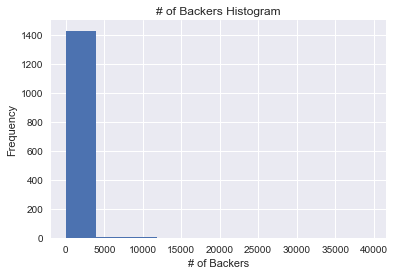

In [49]:
## Looking at USD projects only.
usa = df[(df.symbol=='$') & (df.pledged_amt > df.goal)][['name','goal', 'pledged_amt', 'backers_count']].copy()
usa.backers_count.plot('hist')
plt.xlabel('# of Backers')
plt.title('# of Backers Histogram');

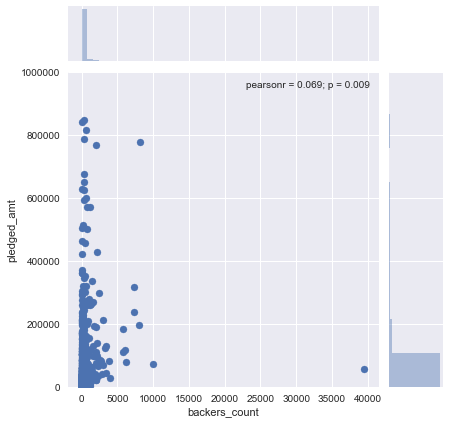

In [51]:
## Analysis of relationship between backers count and pledged amount
sns.jointplot(usa.backers_count, usa.pledged_amt)
plt.ylim([0,1000000])
plt.show()

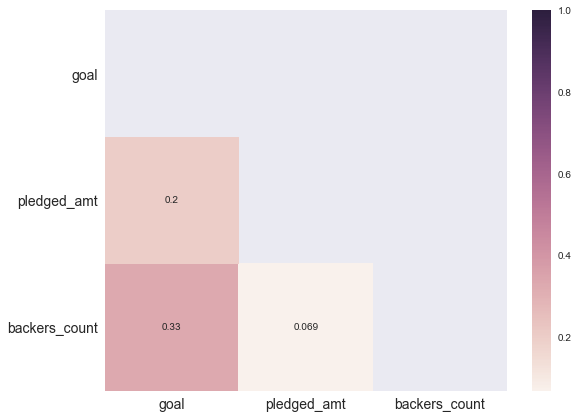

In [52]:
# Set init variables
corr = usa.corr()

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, annot=True, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation='horizontal')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation='horizontal')

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### Analysis:
Next steps to take would be to analyze which products have a high pledged_amt/backers_count. Hypothesizing that the lower the ratio, the more interested backers are in this particular product. Another step would be to categorize into specific categories (graphs above show mix of technology products).

Then XO can take steps into looking at similar products.